# HW 3: Linear Programming
---
## OR/ISE 501 - Fall 2021
__Assigned:__ Tue, 13 Sep (Groups of 2)  
__Due:__ 11:59p, Tue, 21 Sep

__Group Members:__ Kamlesh Pandey & Ronak Dhongde

Please use the Code cells in this Jupyter notebook to answer each of the following questions. Please run all of the cells in your notebook and then submit it via Moodle. (There is a Run All Cells command under the Run menu.)

---
__(1)__ Determine the location that minimizes the sum of the Euclidean distance to the three points in the figure below, and that is outside of the infeasible region.

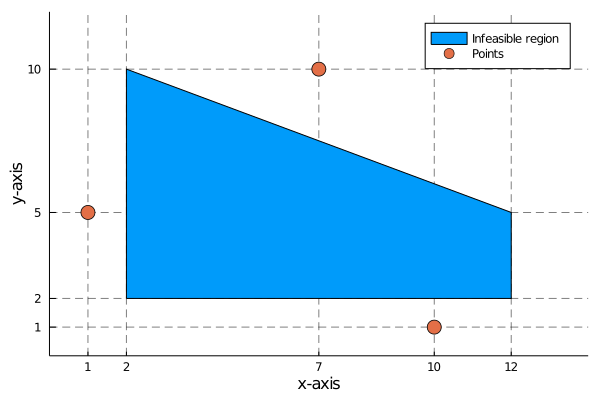


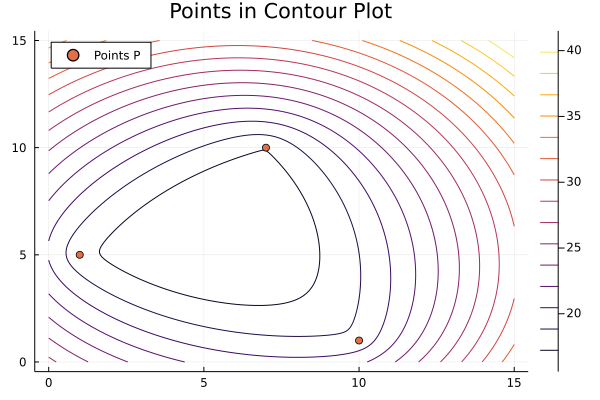

In [1]:
using Optim, Plots

P = [10 1; 1 5; 7 10]  # co-ordinates of the points
x = [4., 9.]  #initial point

function dist2(x,P)                                #function to calculate the distance
    return sqrt.(sum((x' .-P).^2, dims=2))
end

xrng = 0:.1:15        #x-range
yrng = 0:.1:15        #y-range


contour(xrng, yrng, (x,y) -> sum(dist2([x,y],P) ))
scatter!(P[:,1], P[:,2], label="Points P", legend=:topleft, title="Points in Contour Plot")


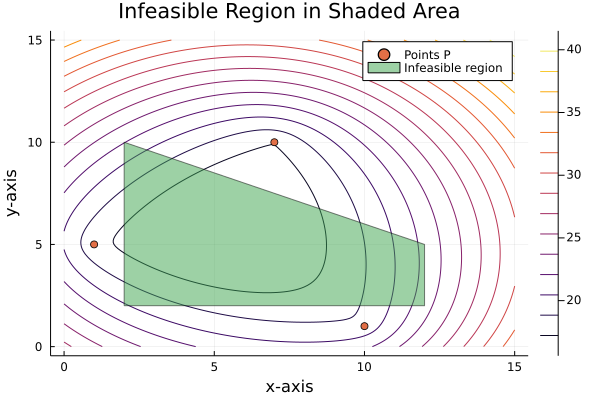

In [2]:
# solving the equation of Infeasible region for the coefficients

A = [-1 0; 1 0; 0 -1; 1 2]   
b = [-2,12,-2,22]

S(x) = all(A*x[:] .<= b) ? true : false  # put comment

plot!(Shape([2,12,12,2], [2,2,5,10]), legend = true, opacity=0.5,label = "Infeasible region", title= "\nInfeasible Region in Shaded Area",xlabel = "x-axis", ylabel = "y-axis")


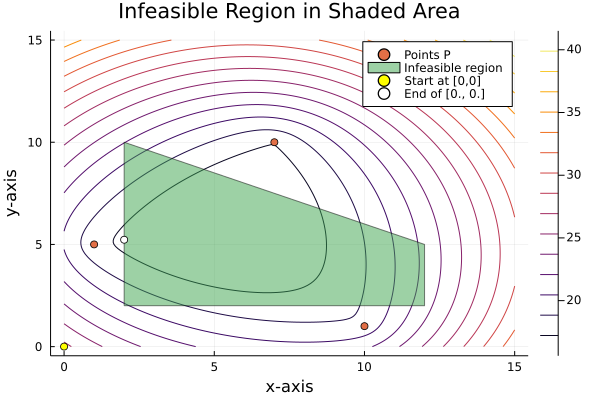

In [3]:
dist2cstr(xy,P) = S(xy) ? Inf : dist2(xy,P)   # calulating distance if S(xy) is false give a huge penalty else simply calculate distance

# using [0., 0.] as a starting point

xy0 = [0., 0.]   # starting point
scatter!([xy0[1]], [xy0[2]], markercolor=:yellow, label="Start at [0,0]")  
xy° = optimize(xy -> sum(dist2cstr(xy, P)), xy0).minimizer
scatter!([xy°[1]], [xy°[2]], markercolor=:white, label="End of [0., 0.]")

In [4]:
println("Location that minimizes the sum is: ",(xy°))

Location that minimizes the sum is: [1.9999999262745183, 5.229046533063945]


In [6]:
u , p ,c, d = df.Max_Order, df.Purchase_Price, df.Sale_Price, df.Density  # dataframe columns
using Optim, GLPK, JuMP

model = Model(GLPK.Optimizer)

N = 1:length(p)

@variable(model, 0 <= x[i = N] <= u[i])    # variables
@objective(model, Max, sum((c[i] - p[i])*x[i] for i in N))   # objective function for maximizing the profit
@constraint(model, sum(p[i]*x[i] for i in N) <= 120)   # Budget constraints
@constraint(model, sum(x[i] for i in N) <=30)   # Weight constraint
@constraint(model, sum(x[i]/d[i] for i in N) <= 3)  # density constraint

print(model)

In [7]:
# OPtimize the model
optimize!(model)
N° = objective_value(model)
df.Purchase_Qty_lb = value.(x)   # to store the values in Purcahse_Qty dataframe in df table

println("Max profit is: ", N°)

df

Max profit is: 214.25777777777776


,item,Max_Order,Sale_Price,Purchase_Price,Density,Purchase_Qty_lb
,String,Int64,Int64,Int64,Int64,Float64
1,Coffee,40,6,2,32,15.6089
2,Peppers,10,15,6,8,10.0
3,Ginger,2,8,1,30,2.0
4,Tea,5,25,5,2,2.39111
5,Candy,15,4,2,20,0.0


In [8]:
str = string("Coffee purcahsed: ", string(floor(df.Purchase_Qty_lb[1])), "   Peppers purcahsed: ", string(df.Purchase_Qty_lb[2]), "  Ginger purcahsed: ", string(df.Purchase_Qty_lb[3]),
"   Tea Purcahsed: " , string(floor(df.Purchase_Qty_lb[4])), "   Candy Purcahsed: ", string(df.Purchase_Qty_lb[5]))
println(str)

Coffee purcahsed: 15.0   Peppers purcahsed: 10.0  Ginger purcahsed: 2.0   Tea Purcahsed: 2.0   Candy Purcahsed: 0.0


__(2*b*)__ Since addition cube capacity is available at an additional charge, what is the minimum increase in the cubic feet of items that can be packed that would maximize total profit?

In [9]:
function maxmize_profit(ϕ)
    
    model_density = Model(GLPK.Optimizer)
    @variable(model_density, 0 <= x[i=N] <= u[i])    # variables
    @objective(model_density, Max, sum((c[i] - p[i])*x[i] for i in N))   # objective function for maximizing the profit
    @constraint(model_density, sum(p[i]*x[i] for i in N) <= 120)   # Budget constraints
    @constraint(model_density, sum(x[i] for i in N) <=30)   # Weight constraint
    
    # giving a range of value to density constraint and calculating the maximum profit value
    @constraint(model_density, sum(x[i]/d[i] for i in N) <= ϕ) 
    optimize!(model_density)
    return objective_value(model_density)
end


maxmize_profit (generic function with 1 method)

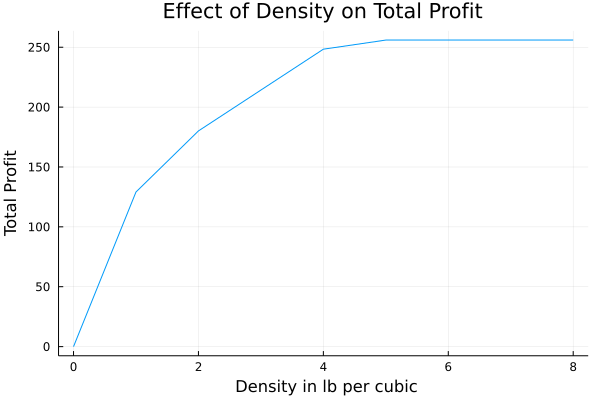

In [10]:
using Plots

density = [0:1:8;] # range of values for density

π° = [maxmize_profit(ϕi) for ϕi in density]

plot(density, π°, legend = false, xlabel = " Density in lb per cubic", ylabel = "Total Profit", title = "Effect of Density on Total Profit")

In [11]:
idx = argmax(π°)
density[idx], π°[idx]

(5, 256.0)

In [12]:
println("The profit is maximum at a density of 5 lb/ft^3..")

The profit is maximum at a density of 5 lb/ft^3..


---
__(3)__ Continuing with Ex 4 from _LP 2_, it has been determined that the amount of corn in the feed cannot exceed forty-five percent of the total feed amount in order to not cause digestive difficulties for the animals. Determine the impact of this on the cost of the feed mix.

In [13]:
#MODEL 
using JuMP, GLPK

model = Model(GLPK.Optimizer)
@variable(model, 0<=x1)    # corn in daily mix (lb)
@variable(model, 0<=x2)    # soybean in daily mix (lb)
@objective(model, Min, .3x1 + .9x2 )     # objective function
@constraint(model, x1 + x2 >=800)   # Min daily feed amount
@constraint(model, 0.09x1 + 0.6x2 >= 0.3(x1+x2))     # at least 30% protein
@constraint(model, 0.02x1 + 0.06x2 <= 0.05(x1+x2))  # at most 5% fiber
print(model)

In [14]:
# addiing additional constraint
# corn amount can not exceed 45% of total amount
@constraint(model, con1, x1 <= 0.45*800)   # Adding additional constraint to the model
print(model)

In [15]:
# optimize the model
optimize!(model)
π° = objective_value(model)

println(" By adding additional constraint to the model the total cost increased, total cost now:", floor(π°) )

 By adding additional constraint to the model the total cost increased, total cost now:503.0


---
__(4)__ Continuing with Ex 3 from _LP 3_, each product 1-3 has a production rate of 16, 8, and 3 L/hr, respectively.

__(4*a*)__ Determine how many liters of each product should be produced if there are 12 hours in total available for production.

In [16]:
A = [2 3 5 0; 0 0 7 3; 2 2 0 1] ./ [10, 10, 5]  # Quantity of input for per Liter production

p = [10,20,30]  # product sale price ($/L)
c = [4,3,5,1]  # input cost ($/L)
u = [100,40,80] # Product upper bound (L)
b = [40,20,30,80]  # Input upper bound (L)
using JuMP, Optim, GLPK, DataFrames
N = 1:length(p)
M = 1:length(c)
model = Model(GLPK.Optimizer)


@variable(model, 0. <= x[i=N] <= u[i])
@objective(model, Max, sum(p[i]*x[i] for i in N) - sum(c[j]*A[i,j]*x[i] for i in N, j in M) )
@constraint(model, con[j=M], sum(A[i,j]*x[i] for i in N)  <= b[j])
print(model)

In [17]:
# adding total production time constraint of 12 hours

prod_time = [16,8,3]   #production rate of each product
@constraint(model, con1, sum(x[i]/prod_time[i] for i in N ) <= 12)
print(model)

In [18]:
# Model optimization

optimize!(model)

x° = value.(x)

N° = objective_value(model)

#production rate of 1-3 chemicals is given 
df = DataFrame(Chemical = ["x1", "x2", "x3"], Optimum_Value_inLiter = [x°[1],x°[2],floor(x°[3])], UB = [100,40,80])

println("Max profit: ", N°)
println("\nThe liter quantities that should be produced based on production time constraint of 12 hours \n ")
println("Chemical-1: ", df.Optimum_Value_inLiter[1], "Chemical-2: ", df.Optimum_Value_inLiter[2], " Chemical-3: ", df.Optimum_Value_inLiter[3])
df

Max profit: 1217.95

The liter quantities that should be produced based on production time constraint of 12 hours 
 
Chemical-1: 4.0Chemical-2: 40.0 Chemical-3: 20.0


,Chemical,Optimum_Value_inLiter,UB
,String,Float64,Int64
1,x1,4.0,100
2,x2,40.0,40
3,x3,20.0,80


__(4*b*)__ Continuing with 3*a*, determine if it would be a good idea to procure an additional 20 L of input 3 at \\$5/L so that 50 L in total is available. Justify your answer.

As value of input 3 corresponding to maximum profit is not binding we can explore the case of additional purcahse of 20L at $5/L

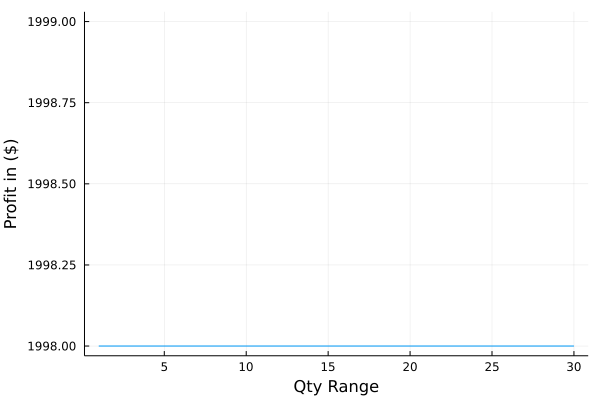

In [19]:
using Plots
function additional_procurement(qty)
    model = Model(GLPK.Optimizer)
    b = [40,20,30+qty,80] # input upper bound
    p = [10,20,30]  # product sale price ($/L)
    c = [4,3,5,1]  # input cost ($/L)
    u = [100,40,80] # Product upper bound (L)
    N = 1:length(p)
    M = 1:length(c)
   
    @variable(model, 0. <= x[i=N] <= u[i])
    @objective(model, Max, sum(p[i]*x[i] for i in N) - sum(c[j]*A[i,j]*x[i] for i in N, j in M) )
    @constraint(model, con[j=M], sum(A[i,j]*x[i] for i in N)  <= b[j])
    
    optimize!(model)
    
    return objective_value(model)
end

qtys = [1:.01:30;]  # a range of number that will be passed as arguments for quantity

profit = [additional_procurement(qty) for qty in qtys]
    
plot(qtys, profit, xlabel = "Qty Range", ylabel="Profit in (\$)", label= false)


_Justification for 4b:_ : 

If optimized value of any decision variable is binding (i.e equal to upper bound), then any increase in decision variable increases the overall profit of the fucntion. In this case as the optimum value of chemical-3 is less than the upper bound, any increase in quantity will decrease overall profit.

So we should not consider the case of buying additional 20L.

__(4*c*)__ Continuing with 4*a*, determine if it would be a good idea to procure an additional 40 L of input 3 at \\$5/L so that 70 L in total is available. Justify your answer.

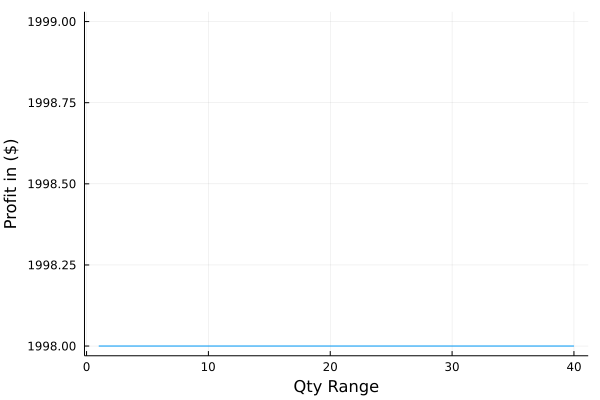

In [20]:
# Function is defined in the last cell

qtys = [1:.01:40;]  # a range of number that will be passed as arguments for quantity

profit = [additional_procurement(qty) for qty in qtys]
    
plot(qtys, profit, xlabel = "Qty Range", ylabel="Profit in (\$)", label= false)


_Justification for 4c:_ : If optimized vaue of any decision variable is binding variable (i.e equal to upper bound), then any increase in the variable increases the overall profit of the fucntion. In this case as the optimum value is less than the upper limit, any increase in quantity will decrease overall profit.

So we should not consider the case of buying additional 40L.

---
__(5)__ The city utility board is considering constructing several mini generators to eliminate the need to purchase all their power. Each mini generator's capacity is 25 MW and the city's typical peak power requirements each month are 150, 160, 110, 175, 130, 150, 190, 200, 120, 100, 140, and 180 MW from January through December each year. Each mini generator needs to be off-line for three months each year for maintenance. The peak values are rough estimates, and power can be purchased (at a high price) to cover any shortfall in capacity. Determine the minimum number of generators the city needs to construct.

In [21]:
using JuMP, Optim, GLPK
p  = [150,160,110,175,130,150,190,200,120,100,140,180]/25    # per month generator requirement
model =Model(GLPK.Optimizer)
@variable(model, 0 <= x[1:12])
@objective(model, Min, sum(x[i] for i in 1:12))
for i=1:12                # total 12 month, so loop till the end of the month
    @constraint(model, sum(x[Int(j - 12*floor((j-1)/12))] for j = i+4:i+12 ) >= floor(p[i]))   # index will start from i+4 as 3 month maintenance
end
print(model)   # model summary

In [22]:
optimize!(model)
N° = objective_value(model)
x° = value.(x)
N°, x°

(8.25, [1.2500000000000004, 0.0, 0.0, 2.25, 0.0, 1.25, 0.0, 1.25, 0.0, 0.0, 0.25000000000000006, 1.9999999999999996])

In [23]:
str = string("The toal number of generator requirement is: ", floor(N°))
print(str)

The toal number of generator requirement is: 8.0

In [1]:
jupyter nbconvert --execute --to pdf notebook.ipynb

LoadError: syntax: extra token "nbconvert" after end of expression